In [2]:
import mne
from mne.preprocessing import ICA
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from scipy.signal import convolve
from scipy.ndimage import convolve1d
import sklearn
import h5py

[n_target_freq * n_channels * points * n_trials]

In [65]:
subject1 = sc.io.loadmat("../data/s3.mat")
data1 = subject1['eeg']
data1 = data1.transpose(0,3,1,2)
data1 *= 1e-6

In [66]:
srate = 256
n_targets = 12
n_channels = 8
n_points = 1114
n_trials = 15
points = np.arange(0, n_points)

target_freq = [9.25, 11.25, 13.25, 9.75, 11.75, 13.75, 10.25, 12.25, 14.25, 10.75, 12.75, 14.75]

tmin = 0.15
tmax = 4
fmin = 1.0
fmax = 60.0

**Preparing data for Epoch Object** \
We define 15 `Epoch` objects for different stimualtion frequencies, for a given subject

In [69]:
subject1data : list[mne.EpochsArray] = []
iir_params = dict(order=4, ftype='butter')

for i in range(n_targets):
    epoched_data = mne.EpochsArray(
        data1[i,:,:,:],
        info = mne.create_info(n_channels, srate, ch_types='eeg'),
        verbose=False
        )
    subject1data.append(epoched_data.filter(l_freq = 1, h_freq = 50, method = 'iir', iir_params = iir_params))

Setting up band-pass filter from 1 - 50 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 50.00 Hz: -6.02, -6.02 dB

Setting up band-pass filter from 1 - 50 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 50.00 Hz: -6.02, -6.02 dB

Setting up band-pass filter from 1 - 50 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 50.00 Hz: -6.02, -6.02 dB

Setting up band-pass filter from 1 - 50 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (e

We generate `Evoked` objects by performing mean over all it's trials

In [70]:
mean_subject1_data : list[mne.EvokedArray] = [data.average(picks='all') for data in subject1data]
tfr_subject1_data : list[mne.time_frequency.AverageTFRArray] = [data.compute_tfr('morlet', freqs=np.arange(3,40,1)) for data in mean_subject1_data]
psd_subject1_data  = [data.compute_psd(fmax = 60, verbose=False) for data in mean_subject1_data]

We plot the Power Spectrum Density for all the channels for different target stimulation

Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).


C:\Users\akila\AppData\Local\Temp\ipykernel_22648\2072326622.py:13: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  verbose=False).plot(axes = axes[freq], show=False)
C:\Users\akila\AppData\Local\Temp\ipykernel_22648\2072326622.py:13: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  verbose=False).plot(axes = axes[freq], show=False)
C:\Users\akila\AppData\Local\Temp\ipykernel_22648\2072326622.py:13: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  verbose=False).plot(axes = axes[freq], show=False)
C:\Users\akila\AppData\Local\Temp\ipykernel_22648\2072326622.py:13: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  verbose=False).plot(axes = axes[freq], show=False)
C:\Users\akila\AppData\Local\Temp\ipykernel_22648\2072326622.py:13: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  verbose=False).plot(axes = axes[freq], show=False)
C:\Users\akila\AppDa

Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).


C:\Users\akila\AppData\Local\Temp\ipykernel_22648\2072326622.py:13: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  verbose=False).plot(axes = axes[freq], show=False)
C:\Users\akila\AppData\Local\Temp\ipykernel_22648\2072326622.py:13: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  verbose=False).plot(axes = axes[freq], show=False)
C:\Users\akila\AppData\Local\Temp\ipykernel_22648\2072326622.py:13: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  verbose=False).plot(axes = axes[freq], show=False)
C:\Users\akila\AppData\Local\Temp\ipykernel_22648\2072326622.py:13: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  verbose=False).plot(axes = axes[freq], show=False)
C:\Users\akila\AppData\Local\Temp\ipykernel_22648\2072326622.py:13: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  verbose=False).plot(axes = axes[freq], show=False)


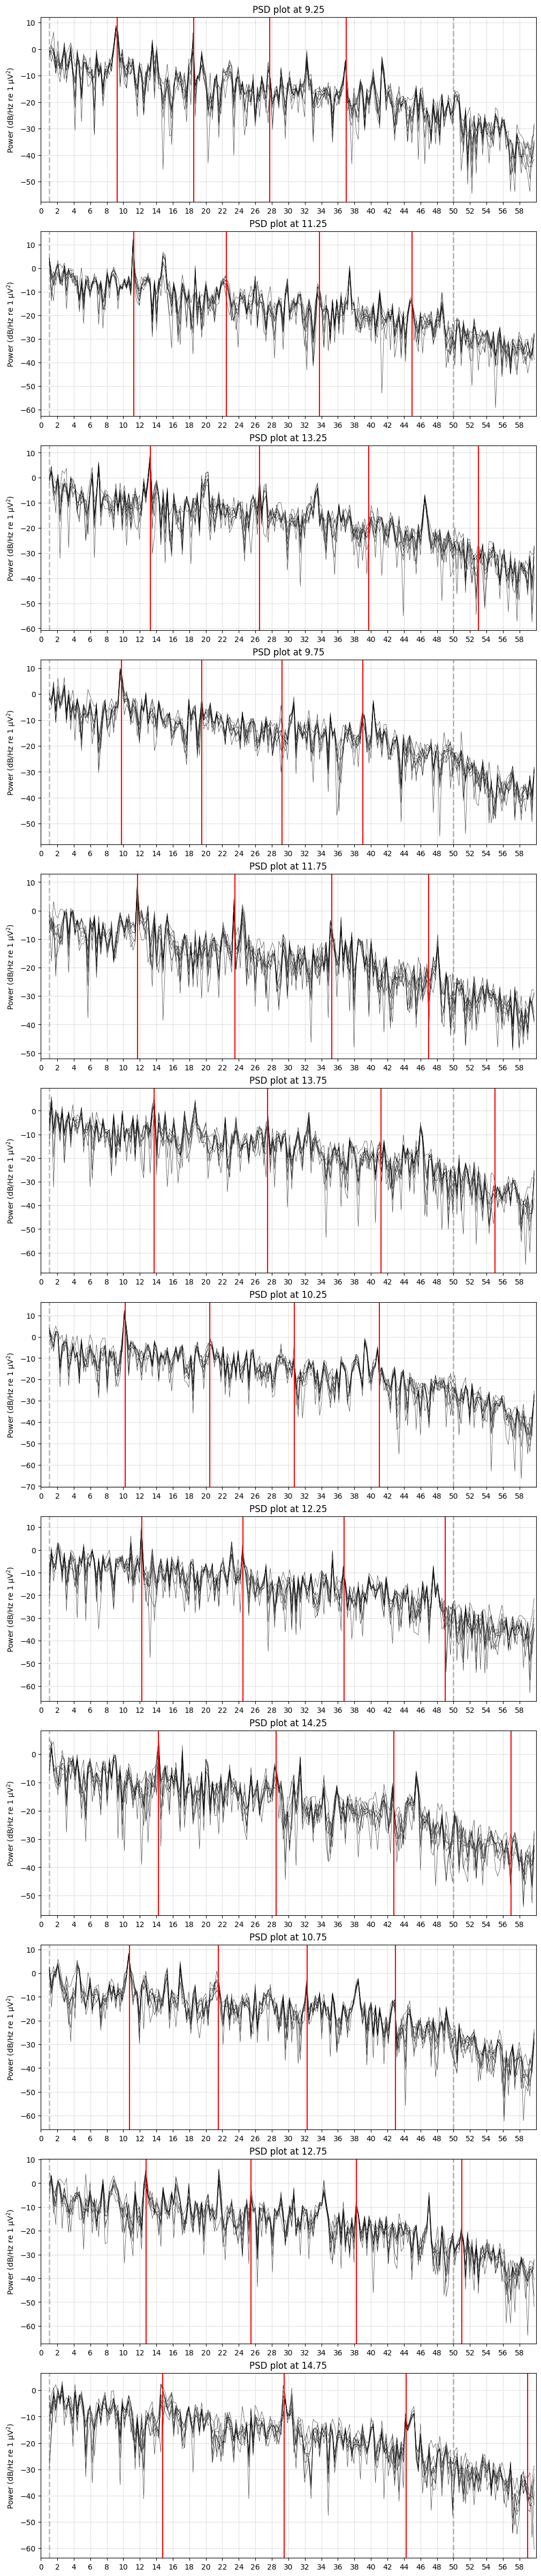

In [71]:
fig, axes = plt.subplots(n_targets, figsize=(10, 4 * n_targets), constrained_layout=True)
for freq in range(n_targets):
    mean_subject1_data[freq].compute_psd(
        "welch",
        n_fft=int(srate * (tmax - tmin)),
        n_overlap=0,
        n_per_seg=None,
        tmin=tmin,
        tmax=tmax,
        fmin=fmin,
        fmax=fmax,
        window="boxcar",
        verbose=False).plot(axes = axes[freq], show=False)
    
    axes[freq].set_xlim(0, 60)
    axes[freq].set_xticks(np.arange(0,60,2))
    axes[freq].set_title(f"PSD plot at {target_freq[freq]}")

    for i in range(1,5):
        axes[freq].axvline(x= i*target_freq[freq], color = 'r')

fig.savefig("Power Spectral Density for Subject 2", dpi = 500)

Computing the SNR in frequency domain, by dividing the power at stimulus frequency by average of local neighbourhood

In [72]:
def snr_spectrum(psd, noise_n_neighbor_freqs=1, noise_skip_neighbor_freqs=1):
    """Compute SNR spectrum from PSD spectrum using convolution.

    Parameters
    ----------
    psd : ndarray, shape ([n_trials, n_channels,] n_frequency_bins)
        Data object containing PSD values. Works with arrays as produced by
        MNE's PSD functions or channel/trial subsets.
    noise_n_neighbor_freqs : int
        Number of neighboring frequencies used to compute noise level.
        increment by one to add one frequency bin ON BOTH SIDES
    noise_skip_neighbor_freqs : int
        set this >=1 if you want to exclude the immediately neighboring
        frequency bins in noise level calculation

    Returns
    -------
    snr : ndarray, shape ([n_trials, n_channels,] n_frequency_bins)
        Array containing SNR for all epochs, channels, frequency bins.
        NaN for frequencies on the edges, that do not have enough neighbors on
        one side to calculate SNR.
    """
    # Construct a kernel that calculates the mean of the neighboring
    # frequencies
    averaging_kernel = np.concatenate(
        (
            np.ones(noise_n_neighbor_freqs),
            np.zeros(2 * noise_skip_neighbor_freqs + 1),
            np.ones(noise_n_neighbor_freqs),
        )
    )
    averaging_kernel /= averaging_kernel.sum()

    # Calculate the mean of the neighboring frequencies by convolving with the
    # averaging kernel.
    mean_noise = np.apply_along_axis(
        lambda psd_: np.convolve(psd_, averaging_kernel, mode="valid"), axis=-1, arr=psd
    )

    # The mean is not defined on the edges so we will pad it with nas. The
    # padding needs to be done for the last dimension only so we set it to
    # (0, 0) for the other ones.
    edge_width = noise_n_neighbor_freqs + noise_skip_neighbor_freqs
    pad_width = [(0, 0)] * (mean_noise.ndim - 1) + [(edge_width, edge_width)]
    mean_noise = np.pad(mean_noise, pad_width=pad_width, constant_values=np.nan)

    return psd / mean_noise

C:\Users\akila\AppData\Local\Temp\ipykernel_22648\251659028.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


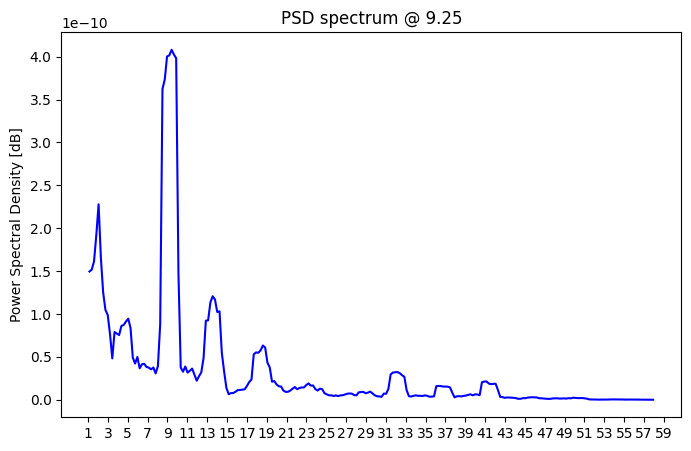

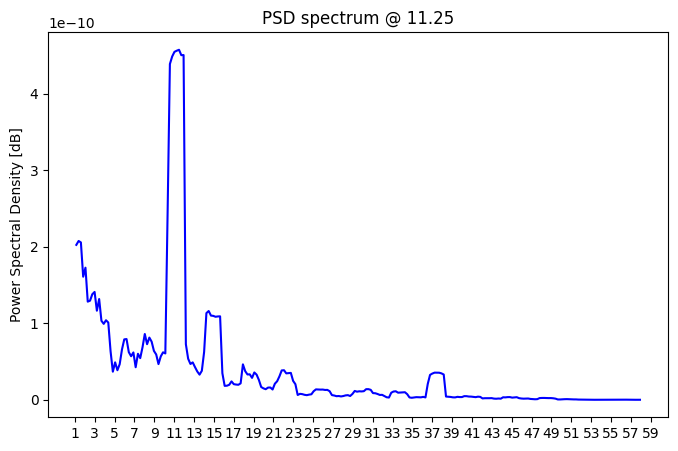

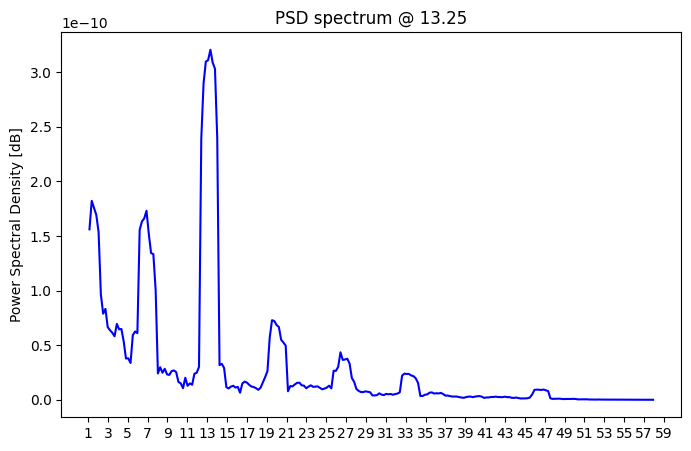

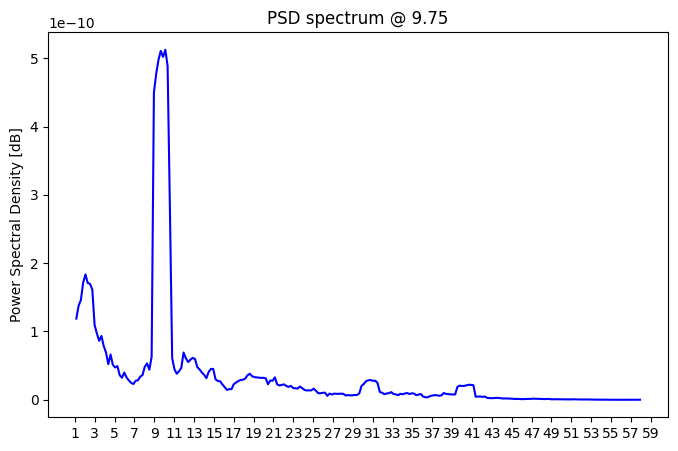

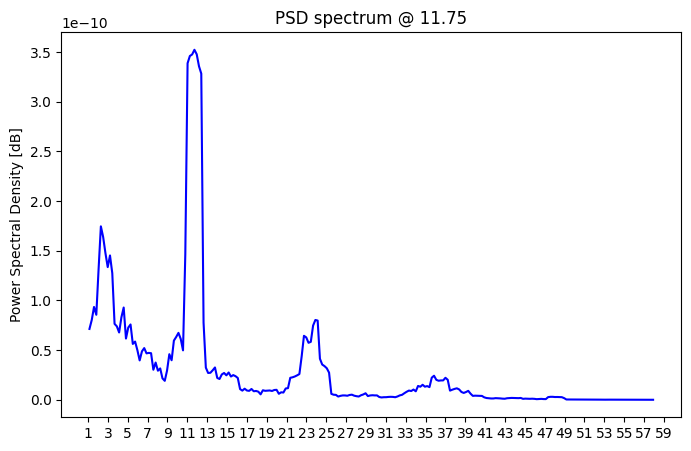

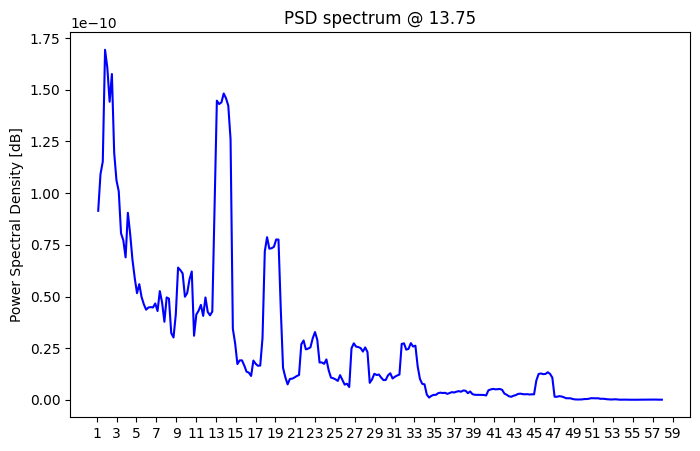

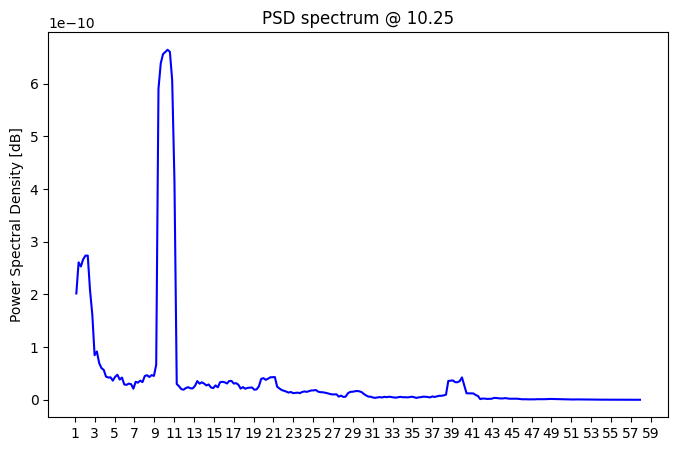

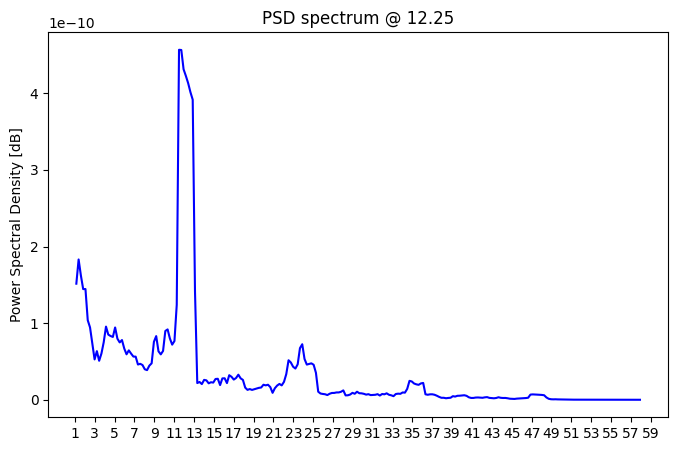

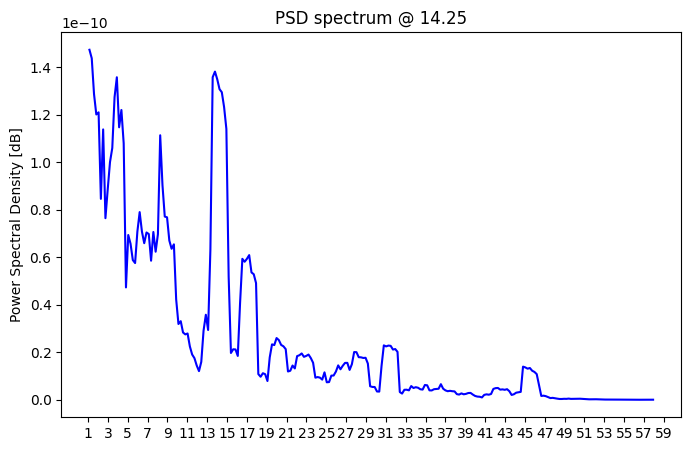

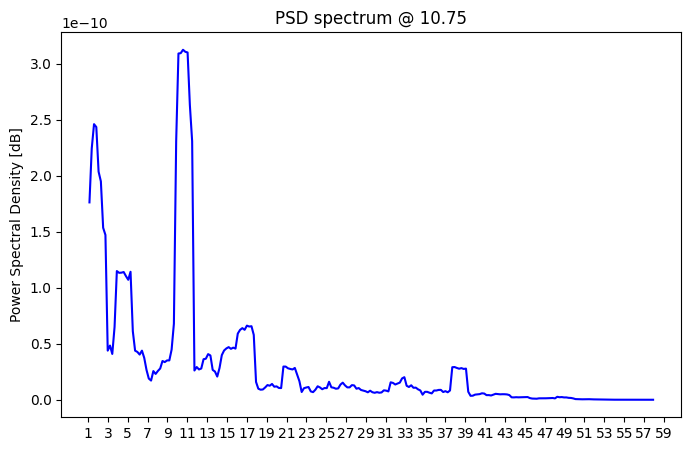

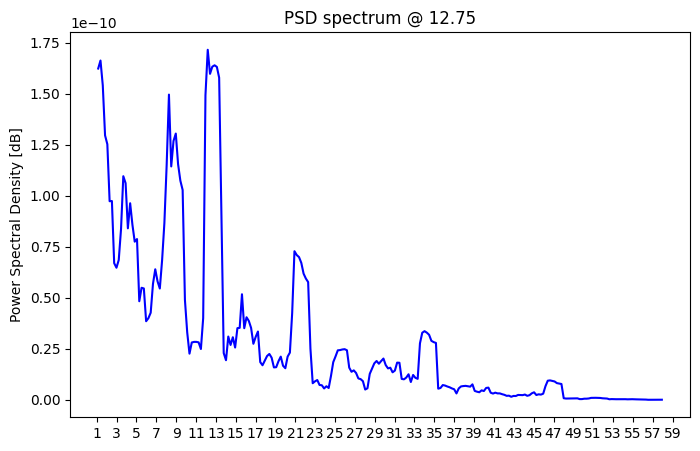

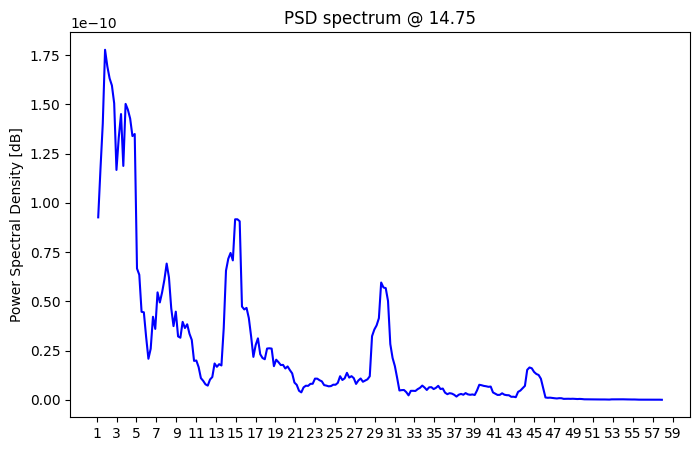

In [96]:

for chf in range(n_targets):
    psds, freqs = psd_subject1_data[chf].get_data(return_freqs = True)
    snrs = snr_spectrum(psds, noise_n_neighbor_freqs=3, noise_skip_neighbor_freqs=1)

    ch = 7

    fig, axes = plt.subplots(1, 1, sharex="all", sharey="none", figsize=(8, 5))
    freq_range = range(
        np.where(np.floor(freqs) == 1.0)[0][0], np.where(np.ceil(freqs) == fmax - 1)[0][0]
    )

    psds_plot = 10 * np.log10(psds)
    axes.plot(freqs[freq_range], psds[ch][freq_range], color="b")
    axes.set(title=f"PSD spectrum @ {target_freq[chf]}", ylabel=f"Power Spectral Density [dB]", xticks = np.arange(1, 60, 2))

    # SNR spectrum

    # axes[1].plot(freqs[freq_range], snrs[ch][freq_range], color="r")
    # axes[1].set(
    #     title="SNR spectrum",
    #     xlabel="Frequency [Hz]",
    #     ylabel="SNR",
    #     ylim=[-2, 30],
    #     xlim=[fmin, fmax],
    # )
    fig.show()